<div align="left">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

### Введение в машинное обучение

Демо с переобучением

### Пример 1: задача регрессии, синтетические данные

$X = Y = \mathbb{R}$, 

$l = 50$, 

$n = 3$ признака: $\{1, x, x^2\}$ или $\{1, x, \sin x\}$

In [1]:
import numpy as np

np.random.seed(0)
l = 50

x = np.linspace(0, 30, num=l)
Y = x + 4*np.sin(x) + 3*np.random.randn(l)

X_1 = np.vstack([np.ones_like(x), x, x**2]).T
X_2 = np.vstack([np.ones_like(x), x, np.sin(x)]).T

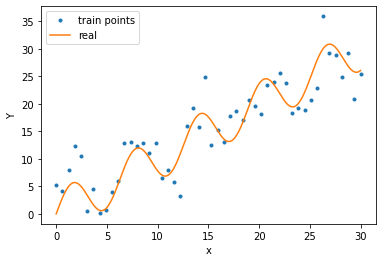

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()

ax.set_xlabel('x')
ax.set_ylabel('Y')

ax.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=1000)
ax.plot(x_plot, x_plot + 4*np.sin(x_plot), label='real')

plt.legend(loc='best')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression(fit_intercept=False)
reg_1.fit(X_1, Y)

reg_2 = LinearRegression(fit_intercept=False)
reg_2.fit(X_2, Y)

LinearRegression(fit_intercept=False)

<div class="alert alert-info">
<b>Вопрос:</b> Что такое intercept?
</div>

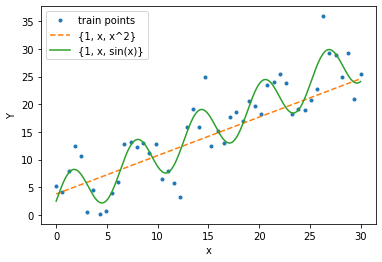

In [4]:
_, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('Y')
ax.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=1000)
X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot)]).T
ax.plot(x_plot, reg_1.predict(X_plot), label='{1, x, x^2}', linestyle='dashed')
ax.plot(x_plot, reg_2.predict(X_plot), label='{1, x, sin(x)}')

plt.legend(loc='best')
plt.show()

### Пример 2: переобучение

Зависимость $y(x) = \frac{1}{1+25x^2}$ на отрезке $x \in \left[-2, 2\right]$

Признаковое описание $x \to (1, x, x^2, \dots, x^n)$

**Модель полиномиальной регрессии**:

$a(x, \theta) = \theta_0 + \theta_1 x + \dots + \theta_n x^n$ — полином степени $n$

**Обучение методом наименьших квадратов**:

$Q(\theta, X^\ell) = \sum\limits_{i=1}^\ell (\theta_0 + \theta_1 x_i + \dots + \theta_n x_i^n - y_i)^2 \to \min\limits_{\theta_0,\dots,\theta_n}$

Обучающая выборка: $X^\ell = \{x_i = 4\frac{i-1}{\ell-1} - 2 | i = 1, \dots, \ell \}$

Контрольная выборка: $X^k = \{x_i = 4\frac{i-0.5}{\ell-1} - 2 | i = 1, \dots, \ell-1 \}$


Что происходит с $Q(\theta, X^\ell)$ и $Q(\theta, X^k)$ при увеличении $n$?


In [5]:
import numpy as np

np.random.seed(0)
l = 50

x = np.linspace(-2, 2, num=l)
Y = 1 / (1 + 25*x**2)

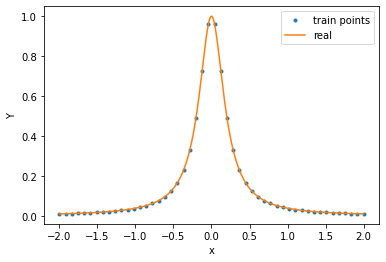

In [6]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()

ax.set_xlabel('x')
ax.set_ylabel('Y')

ax.plot(x, Y, '.', label='train points')

x_plot = np.linspace(-2, 2, num=1000)
y_plot = 1 / (1 + 25*x_plot**2)
ax.plot(x_plot, y_plot, label='real')

plt.legend(loc='best')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

def X(x, n):
    res = [np.ones_like(x)]
    for i in range(1, n):
        res.append(x**i)
    return np.vstack(res).T


In [8]:
x_l = np.array([4*(i - 1)/(l - 1) - 2 for i in range(1, l + 1)])
x_k = np.array([4*(i - 0.5)/(l - 1) - 2 for i in range(1, l)])
lin_reg = LinearRegression(fit_intercept=False)

train_score, test_score = [], []

ns = range(2, 40)
for n in ns:
    X_l = X(x_l, n)
    Y_l = 1 / (1 + 25*X_l**2)
    X_k = X(x_k, n)
    Y_k = 1 / (1 + 25*X_k**2)
    lin_reg.fit(X_l, Y_l)
    train_score.append(np.mean((lin_reg.predict(X_l) - Y_l)**2))
    test_score.append(np.mean((lin_reg.predict(X_k) - Y_k)**2))


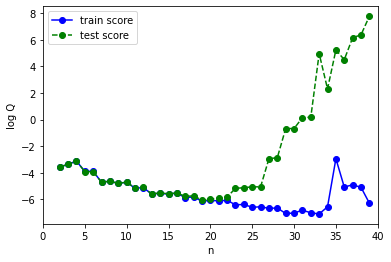

In [9]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()

ax.set_xlabel('n')
ax.set_xlim(0, len(ns) + 2)
ax.set_ylabel('log Q')

ax.plot(ns, np.log(train_score), 'bo-', label='train score')

ax.plot(ns, np.log(test_score), 'go--', label='test score')

plt.legend(loc='best')
plt.show()


<div class="alert alert-info">
<b>Вопрос:</b> Почему такие графики? Как будет меняться точка расхождения $n$ в зависимости от размера обучающей выборки $\ell$ и почему?
</div>

### Переобучение — одна из главных проблем в машинном обучении
Когда **test_loss >> train_loss**